In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jonghyeonbaek","key":"50710238416b3cc742400a7096c38c14"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning 이 일어나지 않도록 
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d ashishsaxena2209/animal-image-datasetdog-cat-and-panda

 96% 361M/376M [00:13<00:00, 29.4MB/s]
100% 376M/376M [00:13<00:00, 29.7MB/s]


In [9]:
!unzip dataset.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: animals/animals/dogs/dogs_00008.jpg  
  inflating: animals/animals/dogs/dogs_00009.jpg  
  inflating: animals/animals/dogs/dogs_00010.jpg  
  inflating: animals/animals/dogs/dogs_00011.jpg  
  inflating: animals/animals/dogs/dogs_00012.jpg  
  inflating: animals/animals/dogs/dogs_00013.jpg  
  inflating: animals/animals/dogs/dogs_00014.jpg  
  inflating: animals/animals/dogs/dogs_00015.jpg  
  inflating: animals/animals/dogs/dogs_00016.jpg  
  inflating: animals/animals/dogs/dogs_00017.jpg  
  inflating: animals/animals/dogs/dogs_00018.jpg  
  inflating: animals/animals/dogs/dogs_00019.jpg  
  inflating: animals/animals/dogs/dogs_00020.jpg  
  inflating: animals/animals/dogs/dogs_00021.jpg  
  inflating: animals/animals/dogs/dogs_00022.jpg  
  inflating: animals/animals/dogs/dogs_00023.jpg  
  inflating: animals/animals/dogs/dogs_00024.jpg  
  inflating: animals/animals/dogs/dogs_00025.jpg  
  inflating: animals/animals/dogs/dogs_00026.j

In [5]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm

In [6]:
class_names = ['cats','dogs','panda']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
print(class_names)
nb_classes = len(class_names)

IMAGE_SIZE = (128, 128)

['cats', 'dogs', 'panda']


In [7]:
def load_data():
    
    datasets = ['/content/animals/animals']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            data = []
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
            
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')    

        output.append([images, labels])

    return output

In [10]:
data_set = load_data()

  1%|          | 11/1000 [00:00<00:09, 109.29it/s]

Loading /content/animals/animals


100%|██████████| 1000/1000 [00:02<00:00, 393.99it/s]


In [11]:
train_images = data_set[0][0]

In [12]:
train_labels = data_set[0][1]

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_images, train_labels, test_size = 1/3, random_state = 0)

In [14]:
x_train /= 255.0
x_test /= 255.0

0


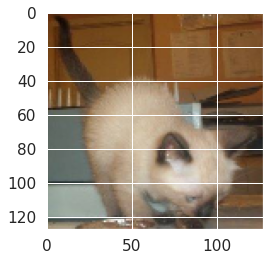

In [15]:
print(y_train[3])
plt.imshow(x_train[3])

In [16]:
set(y_test)

{0, 1, 2}

In [88]:
from tensorflow.keras.layers import *
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(filters = 32,kernel_size = (3,3),activation = 'relu',padding="same",kernel_initializer='he_normal',input_shape=(128,128,3)))
model.add(Conv2D(filters = 32,kernel_size = (3,3),activation = 'relu',padding="same",kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64,kernel_size = (3,3),activation = 'relu',padding="same",kernel_initializer='he_normal'))
model.add(Conv2D(filters = 64,kernel_size = (3,3),activation = 'relu',padding="same",kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))

model.add(Conv2D(filters = 128,kernel_size = (3,3),activation = 'relu',padding="same",kernel_initializer='he_normal'))
model.add(Conv2D(filters = 128,kernel_size = (3,3),activation = 'relu',padding="same",kernel_initializer='he_normal'))
model.add(Conv2D(filters = 128,kernel_size = (3,3),activation = 'relu',padding="same",kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))

model.add(Conv2D(filters = 256,kernel_size = (3,3),activation = 'relu',padding="same",kernel_initializer='he_normal'))
model.add(Conv2D(filters = 256,kernel_size = (3,3),activation = 'relu',padding="same",kernel_initializer='he_normal'))
model.add(Conv2D(filters = 256,kernel_size = (3,3),activation = 'relu',padding="same",kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(4096,activation = 'relu'))
model.add(Dense(4096,activation = 'relu'))
model.add(Dense(1000,activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(3,activation='softmax'))

In [89]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_67 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 128, 128, 32)      9248      
_________________________________________________________________
batch_normalization_36 (Batc (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 64, 64, 64)      

In [91]:
from tensorflow.keras.optimizers import Adam,RMSprop

optimizer = RMSprop(lr=1e-5, momentum=0.9,)
model.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=['accuracy'])

In [32]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
y_train = y_train.reshape(len(y_train),1)
y_train = encoder.fit_transform(y_train)
y_train = y_train.toarray()


ValueError: ignored

In [92]:
history = model.fit(x_train, y_train, epochs=30,batch_size = 32, validation_data = (x_test,y_test),
                    verbose=1)

Epoch 1/30
63/63 [==============================] - 4s 59ms/step - loss: 1.6108 - accuracy: 0.5210 - val_loss: 2.1101 - val_accuracy: 0.3270
Epoch 2/30
63/63 [==============================] - 3s 49ms/step - loss: 0.8793 - accuracy: 0.6160 - val_loss: 3.4025 - val_accuracy: 0.3140
Epoch 3/30
63/63 [==============================] - 3s 49ms/step - loss: 0.7380 - accuracy: 0.6730 - val_loss: 2.2096 - val_accuracy: 0.3720
Epoch 4/30
63/63 [==============================] - 3s 48ms/step - loss: 0.6186 - accuracy: 0.7355 - val_loss: 2.3412 - val_accuracy: 0.3890
Epoch 5/30
63/63 [==============================] - 3s 48ms/step - loss: 0.5106 - accuracy: 0.7870 - val_loss: 2.3537 - val_accuracy: 0.3910
Epoch 6/30
63/63 [==============================] - 3s 48ms/step - loss: 0.4085 - accuracy: 0.8270 - val_loss: 1.5398 - val_accuracy: 0.5350
Epoch 7/30
63/63 [==============================] - 3s 49ms/step - loss: 0.2999 - accuracy: 0.8865 - val_loss: 2.2617 - val_accuracy: 0.4880
Epoch 8/30
63

In [93]:
pred = model.evaluate(x_test, y_test)

32/32 [==============================] - 0s 12ms/step - loss: 2.1765 - accuracy: 0.7170


In [94]:
prediction = model.predict(x_test)
pred=np.argmax(model.predict(x_test),axis=1)


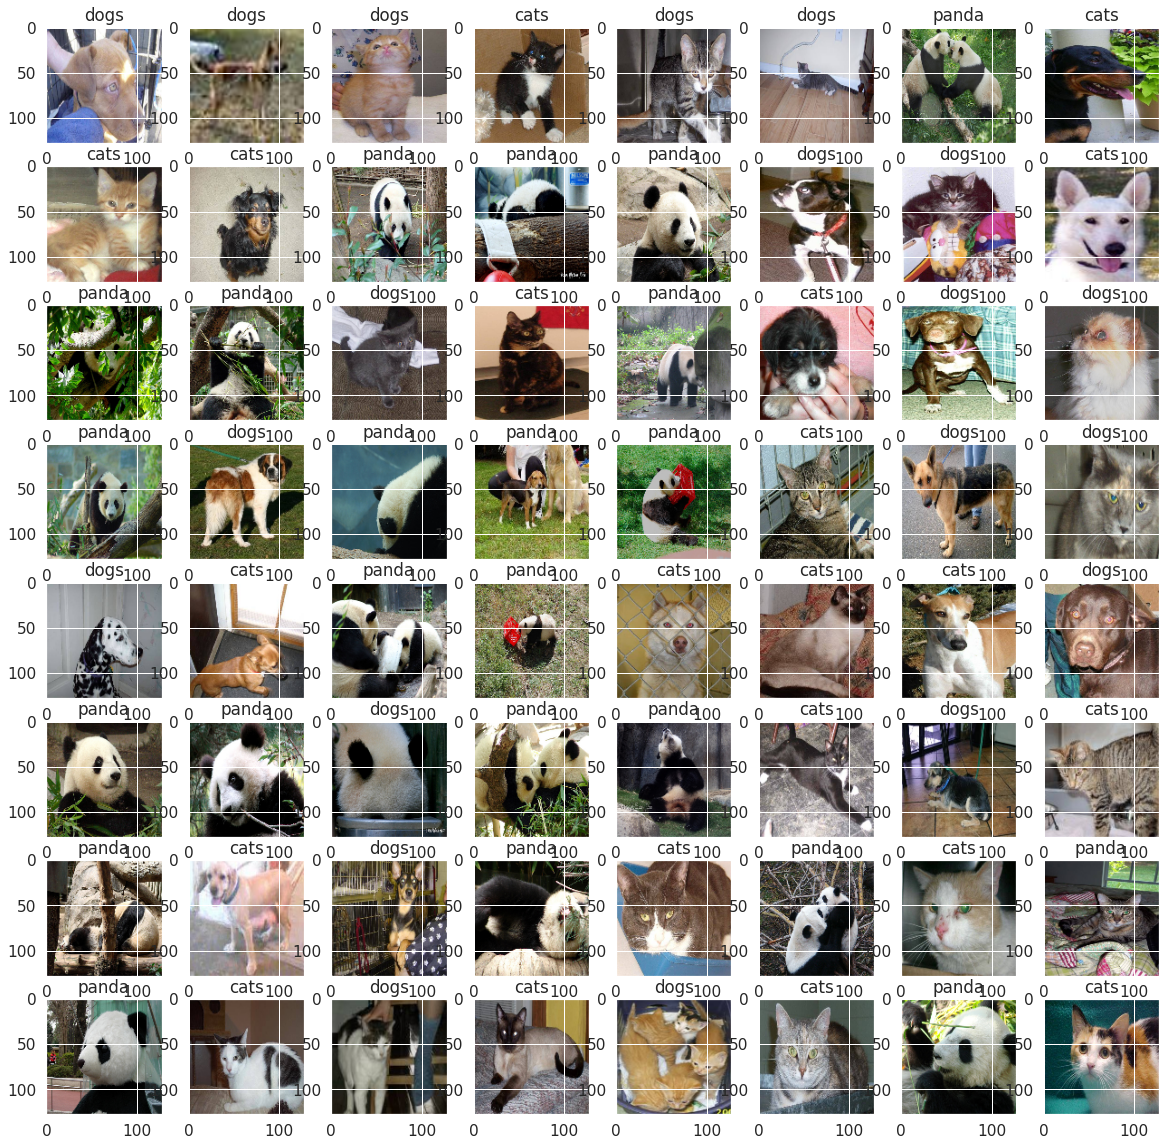

In [95]:
plt.figure(figsize=(20,20))
pltNum = 1
for a in range(8):
    for b in range(8):
          plt.subplot(8, 8, pltNum)
          plt.imshow(x_test[pltNum])
          plt.title(class_names[pred[pltNum]])
          pltNum += 1